In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

imdb_df = pd.read_csv("imdb_clean.csv")

imdb_df.columns = ["titulo", "ano de lancamento", "duracao", "genero", "notas", "Money(M)"]
display(imdb_df.head())

,titulo,ano de lancamento,duracao,genero,notas,Money(M)
0,The Shawshank Redemption,1994,142,Drama,9.3,28.34
1,The Godfather,1972,175,Crime,9.2,134.97
2,The Godfather,1972,175,Drama,9.2,134.97
3,The Dark Knight,2008,152,Action,9.0,534.86
4,The Dark Knight,2008,152,Crime,9.0,534.86


In [2]:
def calcula_media_por_genero(imdb_df, genero):
    imdb_df_filter  = (imdb_df['genero'] ==genero) & (imdb_df['notas'])
    return imdb_df.loc[imdb_df_filter, ['notas']].mean()
    

def calcula_media_por_dinheiro_gasto(imdb_df, genero):
    imdb_df_filter  = (imdb_df['genero'] ==genero) & (imdb_df['Money(M)'])
    return int(imdb_df.loc[imdb_df_filter, ['Money(M)']].mean())

generos = imdb_df['genero'].str.split().explode().unique()

media_notas_df = (imdb_df.groupby('genero')[['notas']].mean()) #media de notas de todos os generos
print(media_notas_df)
maior_media = media_notas_df.max()#maior media entre os generos

media_dinheiro_gasto_df = (imdb_df.groupby('genero')[['Money(M)']].mean())
    
maior_gasto = media_dinheiro_gasto_df.max() #genero que mais gasta

              notas
genero             
Action     7.986957
Adventure  7.983069
Animation  7.942857
Biography  7.971028
Comedy     7.910000
Crime      7.991707
Drama      7.980848
Family     7.932692
Fantasy    7.927419
Film-Noir  7.977273
History    7.933333
Horror     7.875758
Music      7.909677
Musical    7.943750
Mystery    7.992233
Romance    7.940800
Sci-Fi     7.986567
Sport      7.980000
Thriller   7.929787
War        8.050000
Western    8.052941


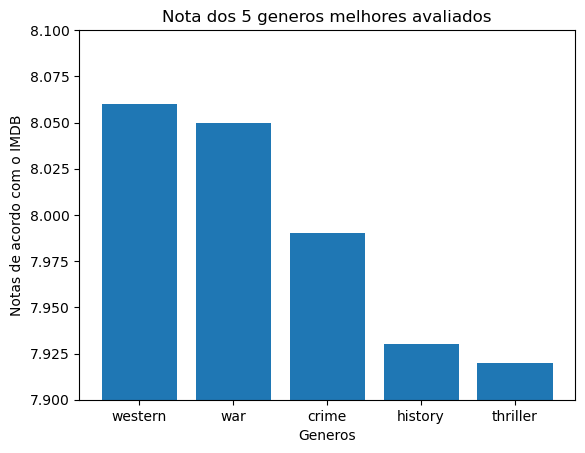

In [3]:
eixo_y = [8.06, 8.05, 7.99, 7.93, 7.92]
eixo_x = ['western', 'war', 'crime', 'history', 'thriller']
plt.bar(eixo_x, eixo_y)
plt.axis(ymin = 7.9, ymax = 8.1)
plt.ylabel('Notas de acordo com o IMDB')
plt.xlabel('Generos')
plt.title('Nota dos 5 generos melhores avaliados')
plt.show()

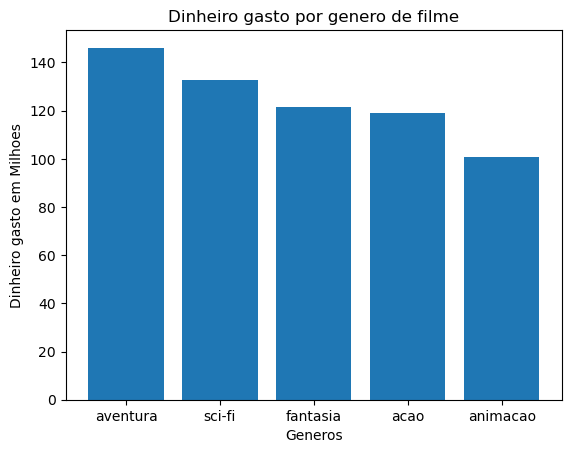

In [4]:
eixo_y = [146.1, 132.8, 121.6, 119, 100.6]
eixo_x = ['aventura', 'sci-fi', 'fantasia', 'acao', 'animacao']
plt.bar(eixo_x, eixo_y)
plt.ylabel('Dinheiro gasto em Milhoes')
plt.xlabel('Generos')
plt.title('Dinheiro gasto por genero de filme')
plt.show()


In [5]:
with open('imdb_clean.csv', 'r') as arquivo:
    linhas = arquivo.readlines()

# Deletar a palavra em cada linha
palavra_a_deletar = "min"  # Substitua "palavra" pela palavra que você deseja deletar

linhas_modificadas = []
for linha in linhas:
    linha_modificada = linha.replace(palavra_a_deletar, '')
    linhas_modificadas.append(linha_modificada)

# Escrever as linhas modificadas de volta no arquivo
with open('imdb_clean.csv', 'w') as arquivo:
    arquivo.writelines(linhas_modificadas)

In [6]:
imdb_df = pd.read_csv("imdb_clean.csv")
display(imdb_df.head())
imdb_df.columns = ["titulo", "ano de lancamento", "duracao", "genero", "notas", "Money(M)"]
display(imdb_df.head())

,title,release_year,runtime,genre,rating,gross(M)
0,The Shawshank Redemption,1994,142,Drama,9.3,28.34
1,The Godfather,1972,175,Crime,9.2,134.97
2,The Godfather,1972,175,Drama,9.2,134.97
3,The Dark Knight,2008,152,Action,9.0,534.86
4,The Dark Knight,2008,152,Crime,9.0,534.86


,titulo,ano de lancamento,duracao,genero,notas,Money(M)
0,The Shawshank Redemption,1994,142,Drama,9.3,28.34
1,The Godfather,1972,175,Crime,9.2,134.97
2,The Godfather,1972,175,Drama,9.2,134.97
3,The Dark Knight,2008,152,Action,9.0,534.86
4,The Dark Knight,2008,152,Crime,9.0,534.86


In [20]:
dataframe_dados_num = imdb_df.copy()
dataframe_dados_num = dataframe_dados_num.drop('titulo', axis=1)
dataframe_dados_num = dataframe_dados_num.drop('genero', axis=1)
dataframe_dados_num = dataframe_dados_num.drop('ano de lancamento', axis=1)

X = dataframe_dados_num.drop('notas', axis=1)
y = imdb_df["notas"]

from sklearn.model_selection import train_test_split

XTrain, XTeste, yTrain, yTest = train_test_split(X, y, test_size = 0.20)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(XTrain, yTrain)
y_pred = regressor.predict(XTeste)

print(regressor.score(XTeste, yTest))

0.11428032402533028
